### 참고 사이트

+ http://matplotlib.org
+ http://seaborn.pydata.org


### 기본 그래프

선(line), 막대(bar), 히스토그램(histogram), 산포도(scatter), 상자그림(box)

### 1) 질적 데이터
    - 요약방법: 도표
    - 정리방법: 도수분포표, 분할표
    - 그래프: 막대 그래프, 원 그래프

### 2) 양적 데이터
    - 요약방법: 수치
    - 정리방법: 산술평균, 중앙값.
    - 그래프: 히스토그램, Boxplot, 시계열(선) 그래프, 산포도(산점도)
    

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

#### 선 그래프

0     1.155970
10    1.657255
20    1.099766
30    0.867538
40    0.009972
50   -0.477520
60    1.601693
70    2.203052
80    3.308576
90    3.668474
dtype: float64


<AxesSubplot:>

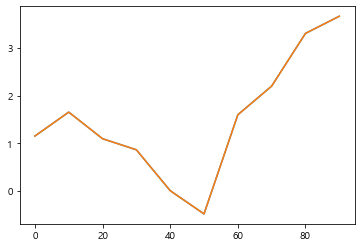

In [23]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
print(s)

s.plot()
s.plot.line()

           가         나         다         라
0   0.628393  0.071478  0.094328  0.460719
10  0.314673  0.382241  0.924395  0.189236
20  0.049926  0.071224  0.567683  0.340090
30  0.127945  0.083962  0.030961  0.989155
40  0.385008  0.681308  0.075324  0.255339
50  0.745156  0.953269  0.652321  0.913793
60  0.986542  0.122082  0.179550  0.144097
70  0.176471  0.687528  0.635264  0.382351
80  0.508592  0.759663  0.527778  0.162852
90  0.695598  0.549405  0.257037  0.932811


<AxesSubplot:>

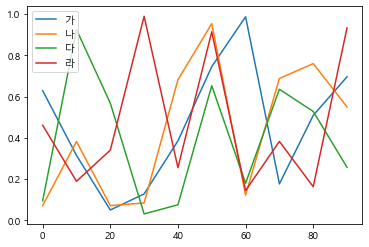

In [24]:
df1 = pd.DataFrame(np.random.rand(10, 4), columns=["가", "나", "다", "라"],
                   index= np.arange(0, 100, 10))
print(df1)
df1.plot()

<AxesSubplot:>

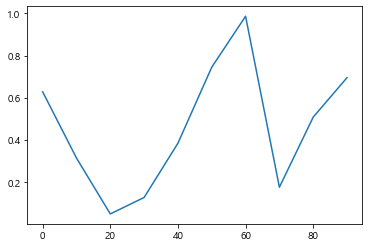

In [25]:
df1["가"].plot()

#### 막대 그래프

<AxesSubplot:>

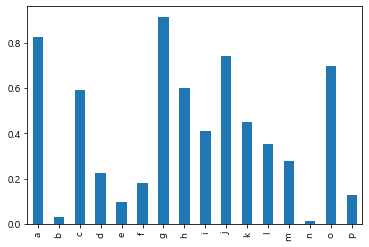

In [2]:
s2 = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))
s2
s2.plot(kind="bar")
s2.plot.bar()

<AxesSubplot:>

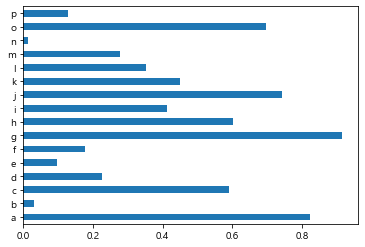

In [3]:
s2.plot(kind="barh")
s2.plot.barh()

<AxesSubplot:>

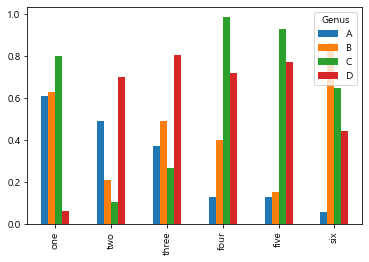

In [4]:
df2 = pd.DataFrame(np.random.rand(6,4),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name = "Genus"))
df2

df2.plot(kind="bar")

<AxesSubplot:>

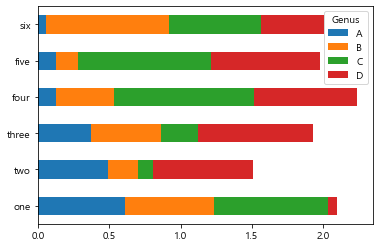

In [6]:
df2.plot(kind="barh", stacked=True) #stack -> 한가지의 막대그래프로 표현하는 옵션

#### 히스토그램

+ X변수가 가질 수 있는 값의 범위만 필요
+ 값만 필요하고 인덱스는 필요없음

<AxesSubplot:>

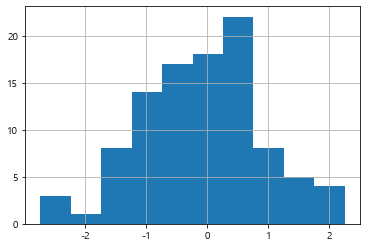

In [9]:
s = pd.Series(np.random.normal(0, 1 , size=100))
s
s.hist()

<AxesSubplot:>

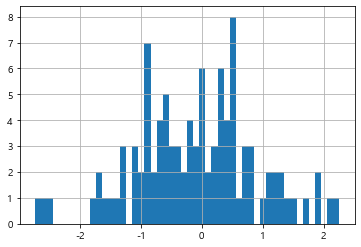

In [10]:
s.hist(bins=50) # bins: 히스토그램의 막대그래프에 갯수를 늘리는 옵션

#### 산포도
+ 두 변수의 관계를 확인:양, 음

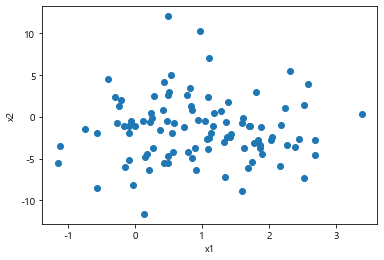

In [22]:
x1 = np.random.normal(1, 1, size=(100, 1))
x1

x2 = np.random.normal(-2, 4, size=(100, 1))
x2

x = np.concatenate((x1, x2), axis=1)
x[:5]

df = pd.DataFrame(x , columns=["x1", "x2"])
df.head()

df.plot.scatter("x1","x2")
plt.scatter(df["x1"], df["x2"])

#### 상자그래프 (Box plot)

<AxesSubplot:>

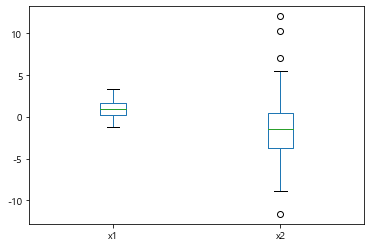

In [23]:
df.plot.box()

---
### matplotlib을 이용한 그래프 그리기

In [3]:
# 데이터 준비
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0, 0.5, 'Total Bill')

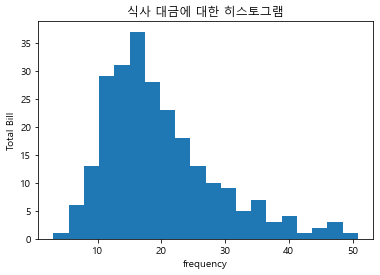

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) #1행 1열 1개

# total_bill에 대한 금액분포 확인
ax.hist(tips["total_bill"], bins=20)
ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

Text(0, 0.5, 'Tip')

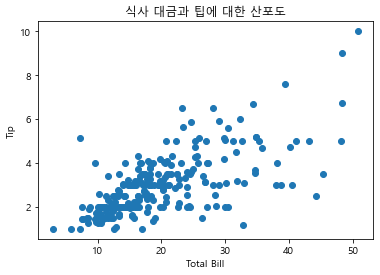

In [31]:
# Tip 과 Total_bill의 관계를 알고 싶다.

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) #1행 1열 1개

ax.scatter(tips["total_bill"], tips["tip"])
ax.set_title("식사 대금과 팁에 대한 산포도")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

Text(0, 0.5, 'Tip')

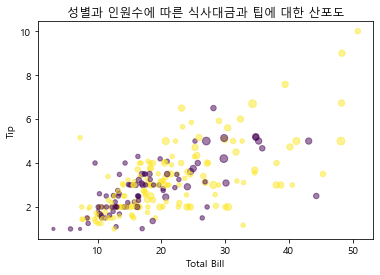

In [60]:
# 성별에 따른 Tip과 따른 Total_bill의 관계를 알고 싶다.

def record_sex(sex):
    if sex == "Female":
        return 0
    else:
        return 1

tips["sex_color"] = tips["sex"].apply(record_sex)
#tips.head()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) #1행 1열 1개

ax.scatter(tips["total_bill"], tips["tip"], c=tips["sex_color"],
          s=tips["size"]*10, alpha=0.5) # c: 색깔옵션, s: 변수에 따른 원의 크기 , alpha: 그래프의 명도
ax.set_title("성별과 인원수에 따른 식사대금과 팁에 대한 산포도")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

Text(0.5, 1.0, '성별에 따른 팁에 대한 box plot')

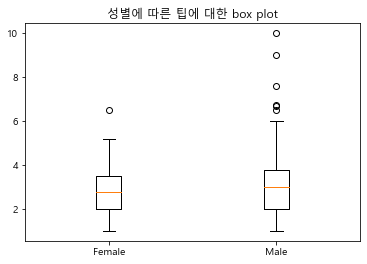

In [52]:
# 성별과 tip의 관계

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) #1행 1열 1개

ax.boxplot([tips[tips["sex"] == "Female"]["tip"], tips[tips["sex"] == "Male"]["tip"]], 
           labels=["Female", "Male"])

ax.set_title("성별에 따른 팁에 대한 box plot")

### seaborn

In [4]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


C:\Users\leeya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Total Bill')

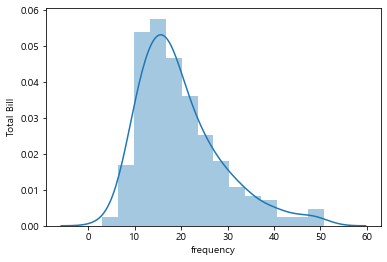

In [61]:
ax = plt.subplot(1, 1, 1)
ax = sns.distplot(tips["total_bill"])
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

C:\Users\leeya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Total Bill')

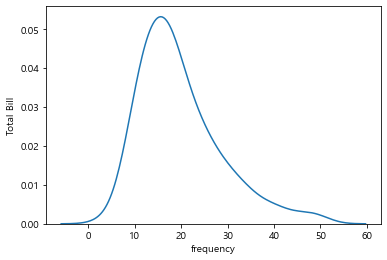

In [62]:
ax = plt.subplot(1, 1, 1)
ax = sns.distplot(tips["total_bill"], hist=False) # hist: 히스토그램 출력여부 옵션
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

C:\Users\leeya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Total Bill')

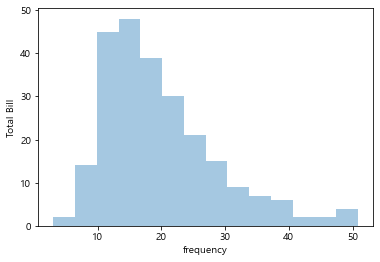

In [63]:
ax = plt.subplot(1, 1, 1)
ax = sns.distplot(tips["total_bill"], kde=False) # kernel density estimation(비모수 추정방식) : 정규분포가 아닌 것을  제외
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

C:\Users\leeya\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Total Bill')

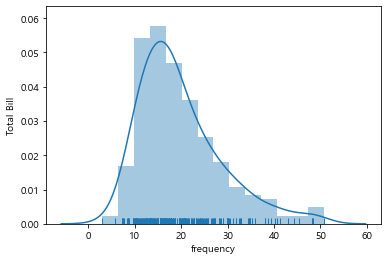

In [64]:
ax = plt.subplot(1, 1, 1)
ax = sns.distplot(tips["total_bill"], rug=True) # rug: 분포도를 알 수 있는 옵션
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

<AxesSubplot:xlabel='day', ylabel='count'>

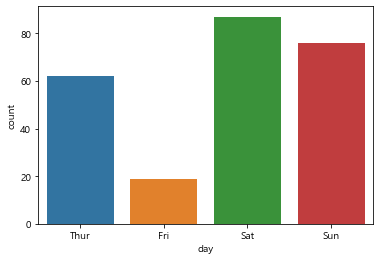

In [66]:
sns.countplot("day", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

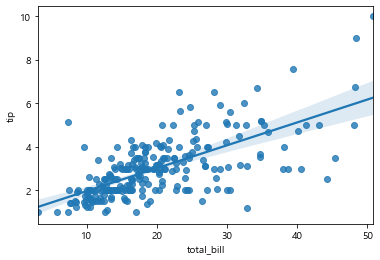

In [68]:
sns.regplot(x="total_bill", y="tip", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

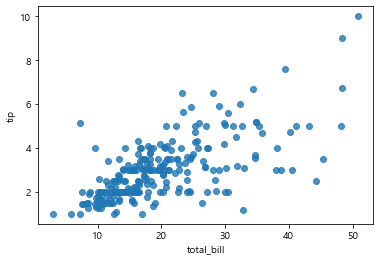

In [69]:
# fit_reg 옵션: 상관그래프 여부 옵션
sns.regplot(x="total_bill", y="tip", data=tips, fit_reg=False)

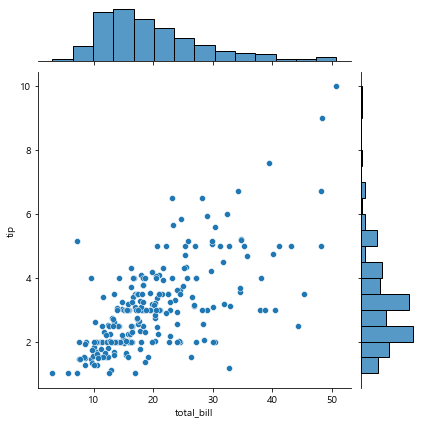

In [70]:
#jointplot: 산포도와 히스토그램을 동시에 
sns.jointplot(x="total_bill", y="tip", data=tips)

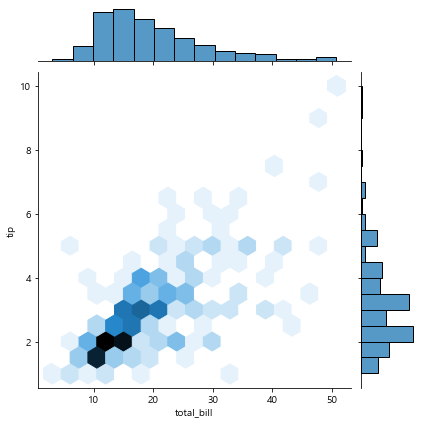

In [71]:
# kind="hex": 산포도의 원이 육각형으로 변경
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")

C:\Users\leeya\anaconda3\lib\site-packages\seaborn\distributions.py:1641: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

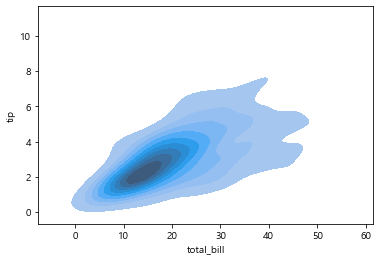

In [75]:
# kde: 비모수추정방식
sns.kdeplot(data=tips["total_bill"], data2=tips["tip"], shade=True)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

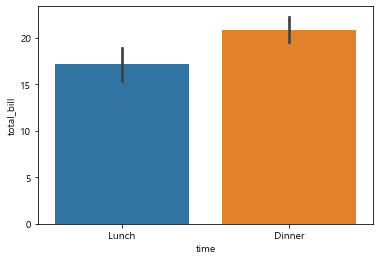

In [76]:
sns.barplot(x="time", y="total_bill", data=tips)

<AxesSubplot:xlabel='sex', ylabel='tip'>

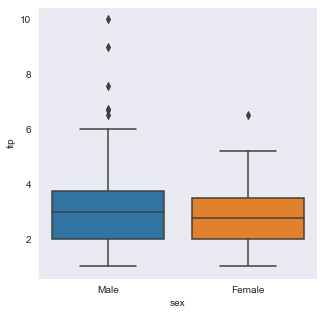

In [52]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="sex", y="tip", data=tips)

Text(0.5, 0.98, 'Boxplot of tips by sex')

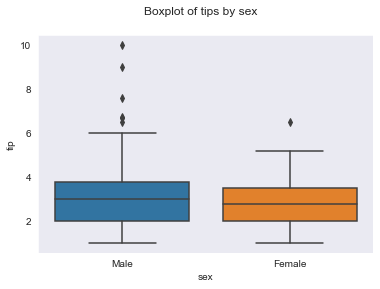

In [50]:
tips = sns.load_dataset("tips")
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(x="sex", y="tip", data=tips)
plt.suptitle("Boxplot of tips by sex")

<AxesSubplot:xlabel='time', ylabel='total_bill'>

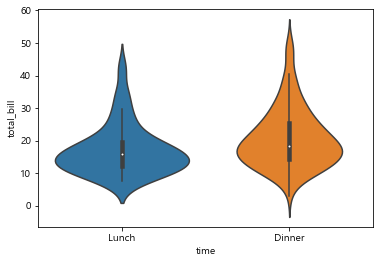

In [79]:
sns.violinplot(x="time", y="total_bill", data=tips)

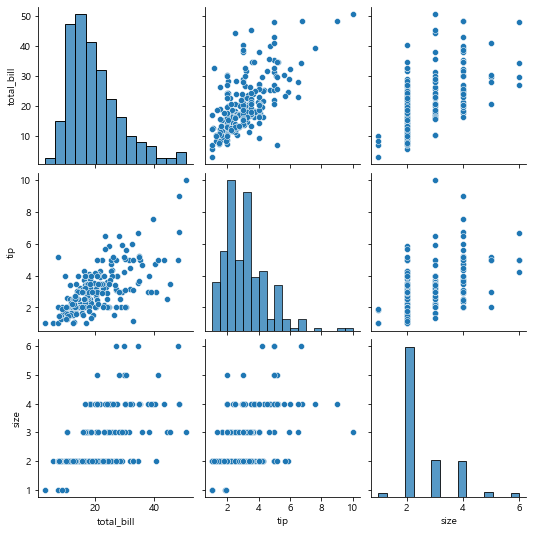

In [90]:
sns.pairplot(tips)

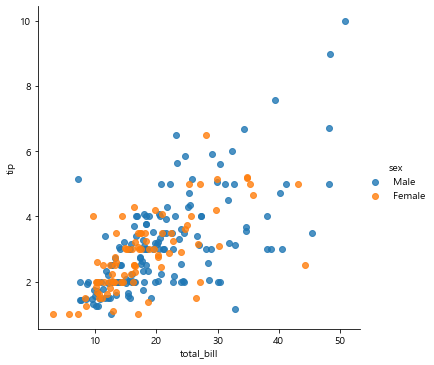

In [93]:
# 성별로 전체 식사대금과 팁의 관계를 확인
## fit_leg: 관계그래프를 키고 끄는 옵션
## hue: 원그래프의 독립변수에 대한 색깔을 입혀주는 옵션
sns.lmplot(x="total_bill", y="tip", data=tips, fit_reg=False,
          hue="sex")

In [113]:
#sns.lmplot(x="total_bill", y="tip", data=tips, hue="sex", scatter_kws={"s":tips["size"]})

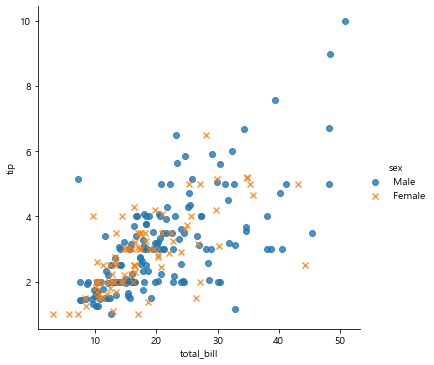

In [98]:
sns.lmplot(x="total_bill", y="tip", data=tips, fit_reg=False,
          hue="sex", markers=["o","x"])

---
### 지도 시각화

+ pip install folium

In [3]:
import folium

In [7]:
map = folium.Map(location=[37.512689, 127.102205])
# zoom_start: 줌옵션
map = folium.Map(location=[37.512689, 127.102205], zoom_start=15) #줌

# tiles: 색깔 옵션
map = folium.Map(location=[37.512689, 127.102205], zoom_start=15, 
                 tiles="Stamen Toner") 
map

In [10]:
state_unemp = pd.read_csv("data/map/folium_US_Unemployment_Oct2012.csv")
state_unemp.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [13]:
state_geo = "data/map/folium_us-states.json"

data/map/folium_us-states.json


In [21]:
map = folium.Map(location=[40, -98], zoom_start=4)
map.choropleth(geo_data=state_geo, data=state_unemp, key_on="feature.id", 
              columns=["State", "Unemployment"], fill_color="YlGn")
map

In [35]:
# Marker
map = folium.Map(location=[37.512689, 127.102205], zoom_start=15)
map

#marker =folium.Marker(location=[37.512689, 127.102205],
#            icon=folium.Icon(color="red", icon="star"))
#marker.add_to(map)

folium.Marker(location=[37.512689, 127.102205], popup="Jamsil.st",
             icon=folium.Icon(color="red", icon="star")).add_to(map)
map

folium.CircleMarker(location=[37.512689, 127.102205], popup="Jamsil.st",
                   radius=50, color="#fffgg", fill_color="#fffggg").add_to(map)
map
#map.save("data/map/map.html")

---
## WordCloud

+ pip install wordcloud

In [37]:
#!pip install wordcloud

In [32]:
from wordcloud import WordCloud, STOPWORDS

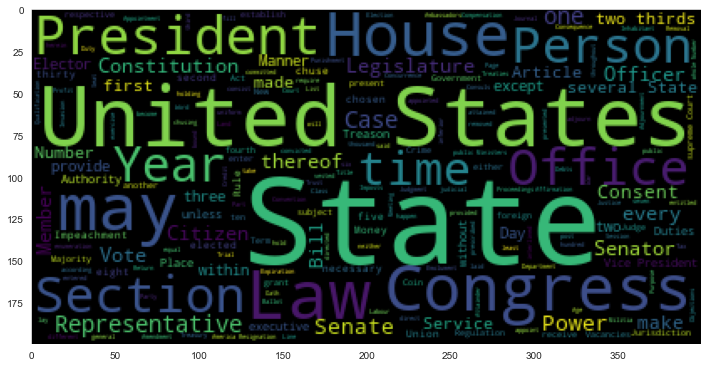

In [34]:
text = open("wordcloud/constitution.txt")
text = text.read()
text

wordcloud = WordCloud().generate(text)
#dir(wordcloud)

# words_ : 각 글자별로 갯수를 나타내주는 객체
wordcloud.words_ 


plt.figure(figsize=(12, 12))

# 그래프를 이미지로
plt.imshow(wordcloud)

(-0.5, 399.5, 199.5, -0.5)

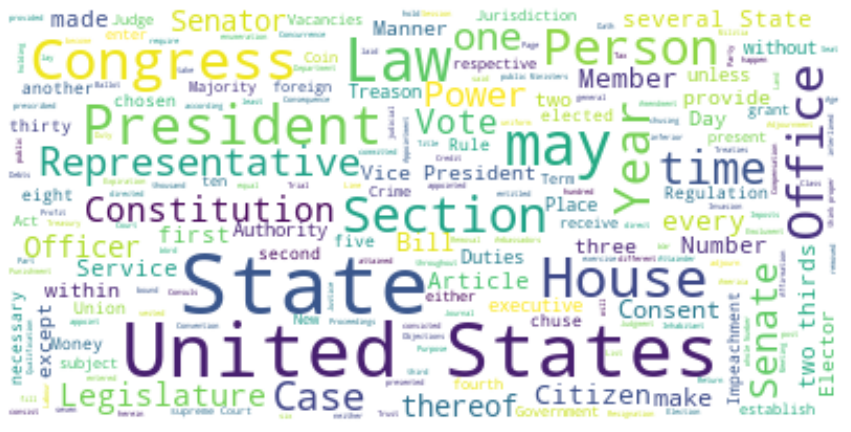

In [51]:
wordcloud = WordCloud(max_font_size=40, background_color="white").generate(text)

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [19]:
from PIL import Image

alice_mask = np.array(Image.open("wordcloud/alice_mask.png"))
alice_mask

plt.figure(figsize=(8, 8))
plt.imshow(alice_mask)

NameError: name 'plt' is not defined

(-0.5, 639.5, 479.5, -0.5)

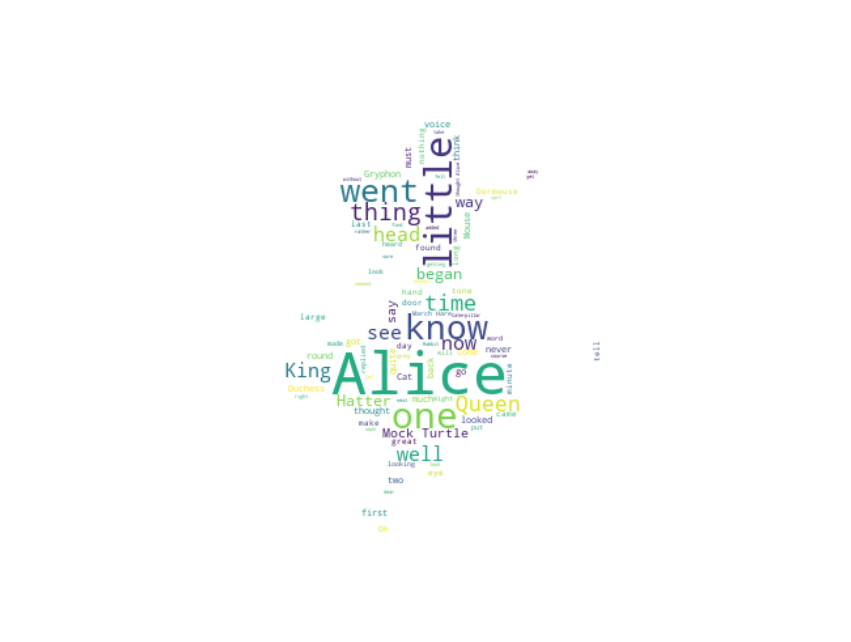

In [68]:
text = open("wordcloud/alice.txt").read()
text
stopwords = set(STOPWORDS)
stopwords.add("said")

wordcloud = WordCloud(max_font_size=60, background_color="white",
                     mask=alice_mask, stopwords=stopwords,
                     max_words=500).generate(text)

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

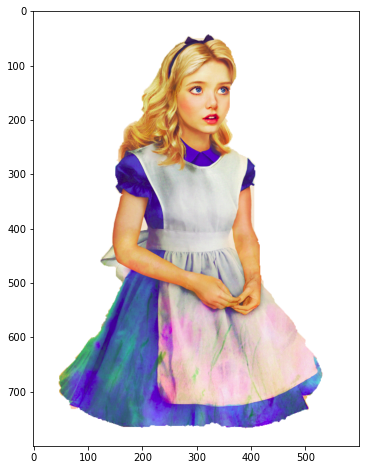

In [70]:
alice = np.array(Image.open("wordcloud/alice.png"))
alice

plt.figure(figsize=(8, 8))
plt.imshow(alice)

(-0.5, 599.5, 799.5, -0.5)

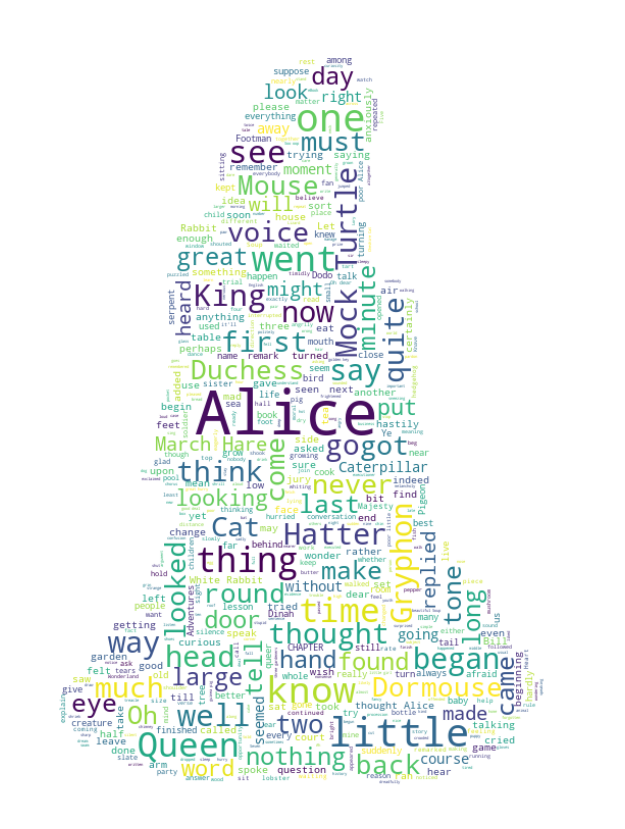

In [71]:
wordcloud = WordCloud(max_font_size=60, background_color="white",
                     mask=alice, stopwords=stopwords,
                     max_words=500).generate(text)

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 599.5, 799.5, -0.5)

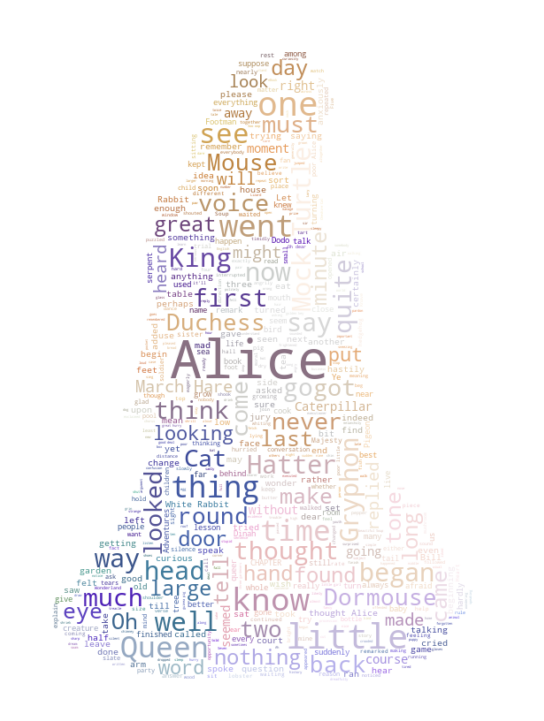

In [76]:
from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(alice)
plt.figure(figsize=(13, 13))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

In [ ]:
# http://konlpy.org

In [36]:
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk

(-0.5, 399.5, 199.5, -0.5)

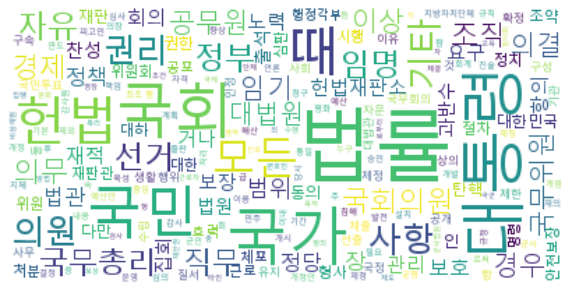

In [45]:
ko_text = kolaw.open("constitution.txt").read()
ko_text

# 형태소 분석
okt = Okt()
token_ko = okt.nouns(ko_text)
token_ko

# 불용어 처리
stop_words = ["제", "월", "일", "조", "그", "이", "안", "바", "및",
            "정", "위", "관", "수"]

token_ko = [each_word for each_word in token_ko if each_word not in stop_words]

# 워드 카운팅
ko = nltk.Text(token_ko, name="대한민국 헌법")
data = ko.vocab()

wordcloud = WordCloud(background_color="white",
                     font_path="C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(data))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

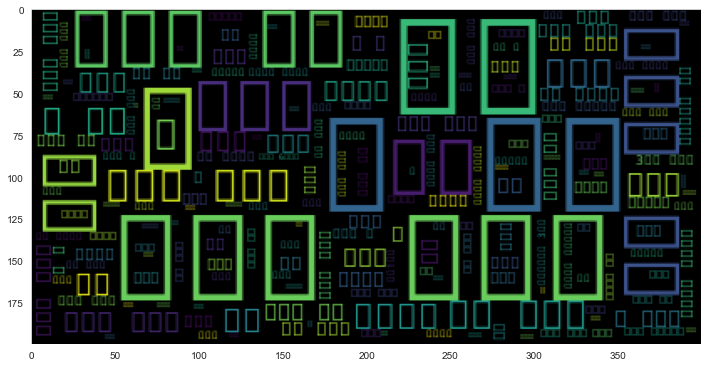

In [38]:
ko_text = kolaw.open("constitution.txt").read()
ko_text

font_path="C:/Windows/Fonts/malgun.ttf"

wordcloud = WordCloud().generate(ko_text)
#dir(wordcloud)

# words_ : 각 글자별로 갯수를 나타내주는 객체
wordcloud.words_ 

plt.figure(figsize=(12, 12))

# 그래프를 이미지로
plt.imshow(wordcloud)